In [32]:
from numpy import *
import camera
from scipy import linalg
a=eye(3)
print a
b=array([[0],[0],[-10]])
print b
P = hstack((eye(3),array([[0],[0],[-10]])))
print P
print '--------------'

a = 0.05*random.rand(3)
R = eye(4)
R[:3,:3] = linalg.expm([[0,-a[2],a[1]],[a[2],0,-a[0]],[-a[1],a[0],0]])
print R
print '---------------------------------------------------------------------'



[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[  0]
 [  0]
 [-10]]
[[  1.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   1. -10.]]
--------------
[[ 0.99774554 -0.04813488  0.04676389  0.        ]
 [ 0.05002175  0.99794468 -0.04005293  0.        ]
 [-0.04473983  0.04230184  0.99810265  0.        ]
 [ 0.          0.          0.          1.        ]]
---------------------------------------------------------------------


projected points into a view


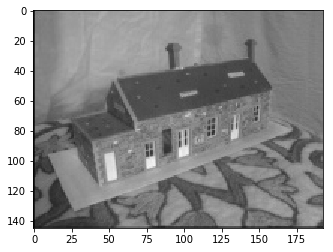

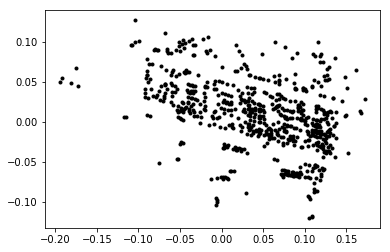

r= [ 0.02882063  0.01877373  0.01777745]
rot= [[ 0.9996658  -0.01750251  0.01902519  0.        ]
 [ 0.01804352  0.99942674 -0.02864658  0.        ]
 [-0.0185129   0.02898029  0.99940853  0.        ]
 [ 0.          0.          0.          1.        ]]


trajectory of projected points under camera rotation


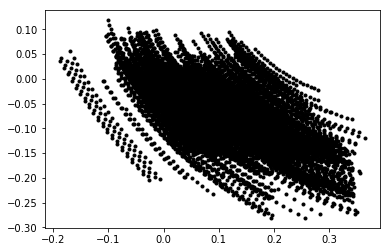

K= [[1000    0  500]
 [   0 1000  300]
 [   0    0    1]]
tmp= [[ 0.54030231 -0.84147098  0.        ]
 [ 0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]
Rt= [[  0.54030231  -0.84147098   0.          50.        ]
 [  0.84147098   0.54030231   0.          40.        ]
 [  0.           0.           1.          30.        ]]
(array([[ 1000.,     0.,   500.],
       [    0., -1000.,   300.],
       [    0.,     0.,     1.]]), array([[ 0.54030231, -0.84147098,  0.        ],
       [-0.84147098, -0.54030231,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]), array([ 50., -40.,  30.]))


In [3]:
import camera
from numpy import *
from PIL import Image
from pylab import *
from scipy import *


im=Image.open('modelhouse.jpg')
figure()
imshow(im)

# Projecting 3D points
# load points
points = loadtxt('house.p3d').T
points = vstack((points,ones(points.shape[1])))
# setup camera
P = hstack((eye(3),array([[0],[0],[-10]])))
cam = camera.Camera(P)
x = cam.project(points)
# plot projection
print'projected points into a view'
figure()
plot(x[0],x[1],'k.')
show()

# create transformation
r = 0.05*random.rand(3)
print 'r=',r
rot = camera.rotation_matrix(r) # tao ma tran quay 3D de quay quanh truc cua vecto r 
print 'rot=',rot
# rotate camera and project
figure()
for t in range(20):
    cam.P = dot(cam.P,rot)
    x = cam.project(points)
    plot(x[0],x[1],'k.')
print; print
print'trajectory of projected points under camera rotation'
show()


#Factoring the camera matrix

K = array([[1000,0,500],[0,1000,300],[0,0,1]])
print 'K=',K
tmp = camera.rotation_matrix([0,0,1])[:3,:3]
print 'tmp=',tmp
Rt = hstack((tmp,array([[50],[40],[30]])))
print 'Rt=', Rt
cam = camera.Camera(dot(K,Rt))
print cam.factor()

# Computing the camera center
